In [1]:
import networkx as nx

# Load the graphml file again
file_path = 'bioneer2.graphml'
G = nx.read_graphml(file_path)

# Filter the graph to only include channels with subscriberCount between 50000 and 8318210
G = G.subgraph([node for node in G.nodes() if 50000 <= G.nodes[node]['subscribercount'] <= 8318210])

# Calculate component measures
# Get the number of connected components
num_connected_components = nx.number_connected_components(G.to_undirected())

# Identify the giant component
giant_component = max(nx.connected_components(G.to_undirected()), key=len)
giant_component_size = len(giant_component)

# Get the size distribution of the components
component_sizes = [len(c) for c in sorted(nx.connected_components(G.to_undirected()), key=len, reverse=True)]

print("Number of connected components:", num_connected_components)
print("Size of giant component:", giant_component_size)
print("Size distribution of components:", component_sizes)

Number of connected components: 1
Size of giant component: 221
Size distribution of components: [221]


In [25]:
# Calculate density of the graph
density = nx.density(G.to_directed())
density

0.012422871246400659

In [24]:
# Calculate the degree assortativity coefficient
degree_assortativity = nx.degree_assortativity_coefficient(G.to_directed())
degree_assortativity

-0.4460479336387566

In [12]:
# Calculate the degree assortativity coefficient
in_degree_assortativity = nx.degree_assortativity_coefficient(G, x='in', y='in')
out_degree_assortativity = nx.degree_assortativity_coefficient(G, x='out', y='out')

in_degree_assortativity, out_degree_assortativity


(0.02756598604581837, -0.05595792039193227)

In [17]:
# Calculate the assortativity coefficient for country
country_assortativity_coefficient = nx.attribute_assortativity_coefficient(G, 'viewcount(100s)')
country_assortativity_coefficient

-0.00468723321050689

In [6]:
intra_edges_count = 0

# Iterate over all edges in the graph
for u, v in G.edges():
    # Check if both nodes have the same country attribute
    if G.nodes[u]['country'] == G.nodes[v]['country']:
        intra_edges_count += 1

print(f"Number of intra-edges for country: {intra_edges_count}")

173

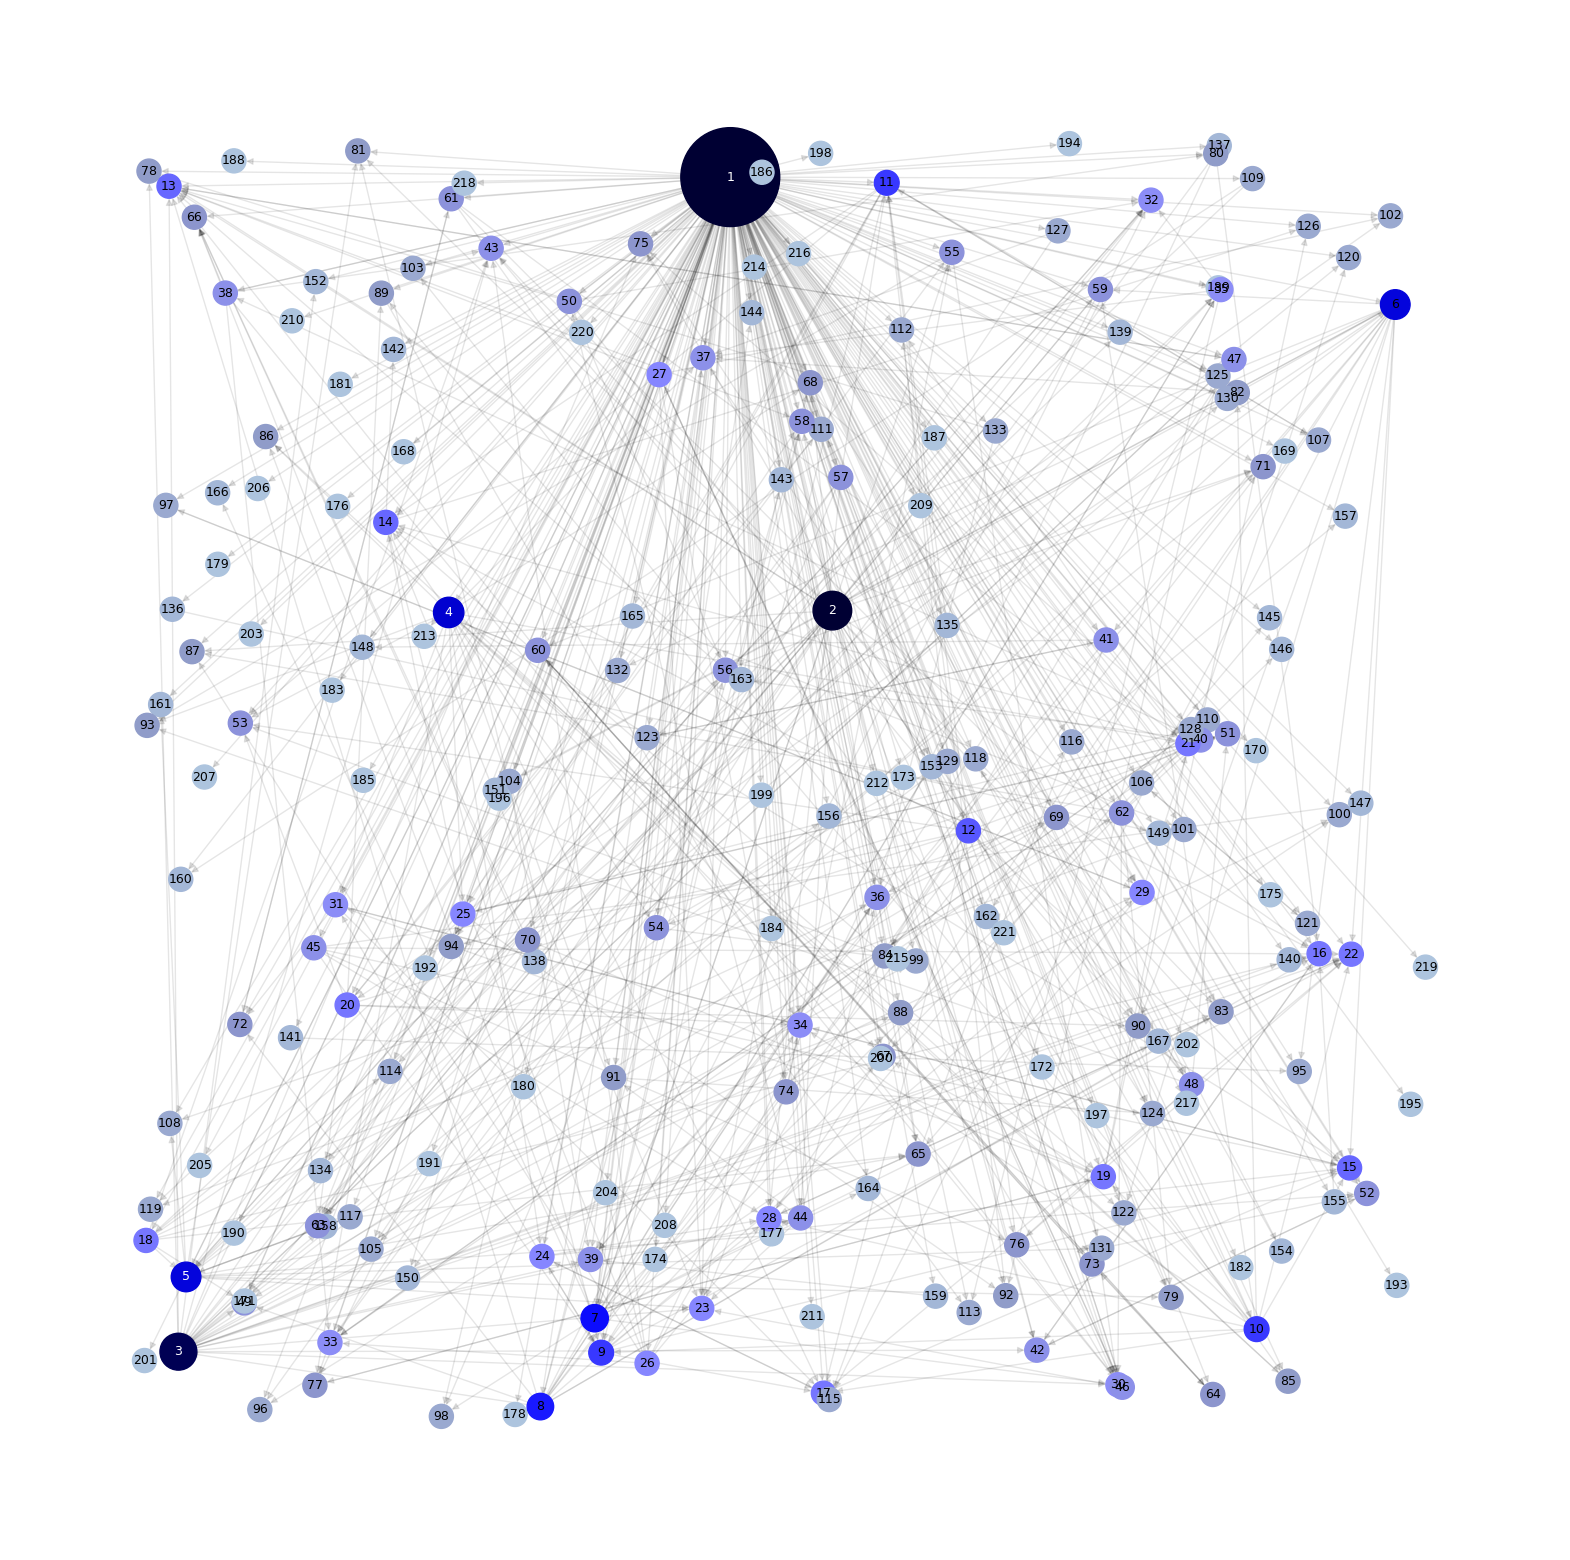

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming 'final' is your graph
# Assuming 'centrality' is a dictionary with the centrality values of the nodes in 'final'

# Set the size of the plot
plt.figure(figsize=(20,20))

# Set the planar layout 
pos = nx.random_layout(G)

centrality = nx.degree_centrality(G)


# Define a minimum node size
min_node_size = 300  # Adjust this value as needed

# Set the size of the nodes based on centrality with a minimum size
node_size = [max(v * 5000, min_node_size) for v in centrality.values()]

# Normalize centrality values
sorted_centrality = sorted(centrality.values(), reverse=True)
second_largest_centrality = sorted_centrality[1]
normalized_centrality = {node: min(centrality[node] / second_largest_centrality, 1.0) for node in G.nodes()}

# Create a custom blue color map with more shades
colors = ["#b3cde3", "#8c96c6", "#8c8cff", "#4c4cff", "#0c0cff", "#0000cc", "#000099", "#000066", "#000033"]  # Gradient of blues
cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=100)

# Map normalized centrality to the custom color map
node_color = [cmap(normalized_centrality[node]) for node in G.nodes()]

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)

# Draw the edges
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=0.1)

# Identify top five nodes
top_five_nodes = sorted(centrality, key=centrality.get, reverse=True)[:5]

# Label the nodes based on their centrality value in descending order
channel_labels = {node: str(i) for i, node in enumerate(sorted(centrality, key=centrality.get, reverse=True), start=1)}

# Draw labels at the nodes' positions, make top 5 labels white
for node, label in channel_labels.items():
    if node in top_five_nodes:
        nx.draw_networkx_labels(G, pos, labels={node: label}, font_size=9, font_color='white', font_family='sans-serif')
    else:
        nx.draw_networkx_labels(G, pos, labels={node: label}, font_size=9, font_family='sans-serif')

# Hide axis
plt.axis('off')

# Show the plot
plt.show()


In [3]:
# Get average clustering coefficient
avg_clustering_coefficient = nx.average_clustering(G.to_directed())
avg_clustering_coefficient

0.25814693266033545

In [15]:
# Get degree centrality for each node with their labels
degree_centrality = [(G.nodes[node]['label'], degree) for node, degree in nx.degree_centrality(G).items()]

# Sort the nodes by their degree centrality
degree_centrality.sort(key=lambda x: x[1], reverse=True)
degree_centrality

[('The Bioneer', 1.0136363636363637),
 ('Funk Roberts', 0.15454545454545454),
 ('Tom Merrick', 0.1409090909090909),
 ('Joe Scott', 0.09545454545454544),
 ('Bodybuilding.com', 0.09090909090909091),
 ('Jon Rettinger', 0.09090909090909091),
 ('Lebe Stark', 0.07727272727272727),
 ('School of Calisthenics', 0.07272727272727272),
 ('PBS Idea Channel', 0.06363636363636363),
 ('CNET Home', 0.06363636363636363),
 ('Jacob Geller', 0.06363636363636363),
 ('NerdSync', 0.05454545454545454),
 ('FitnessFAQs', 0.049999999999999996),
 ('Nerdwriter1', 0.049999999999999996),
 ('minutephysics', 0.049999999999999996),
 ('Strength Project', 0.045454545454545456),
 ('Be Smart', 0.045454545454545456),
 ('SixPackAbs.com', 0.045454545454545456),
 ('Seeker+', 0.045454545454545456),
 ('Cracked', 0.045454545454545456),
 ('Jason Silva: Shots of Awe', 0.045454545454545456),
 ('Vsauce2', 0.045454545454545456),
 ('Jeff Nippard', 0.04090909090909091),
 ('PBS Space Time', 0.04090909090909091),
 ('Lessons from the Screen

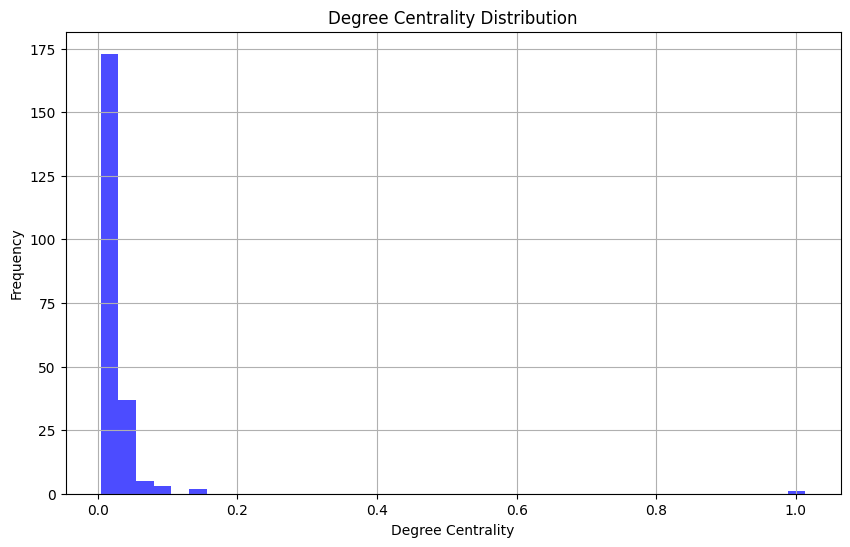

In [14]:
# Plot the degree centrality distribution
import matplotlib.pyplot as plt

# Get the degree centrality values
degree_centrality_values = [degree for node, degree in nx.degree_centrality(G).items()]

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality_values, bins=40, color='blue', alpha=0.7)
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

plt.grid(True)
# Display the plot
plt.show()

In [2]:
# Get average degree
avg_degree = sum([degree for node, degree in G.degree()]) / G.number_of_nodes()
avg_degree

5.46606334841629

In [68]:
# Calculate the assortativity coefficient
assortativity_coefficient = nx.degree_assortativity_coefficient(G.to_directed())
assortativity_coefficient

-0.4460479336387566

In [69]:
# Get the reciprocity of the graph
reciprocity = nx.reciprocity(G.to_directed())
reciprocity

0.08278145695364239

In [63]:
import networkx as nx

# Assuming you have a NetworkX graph called 'G'

def node_vitality(G, node, measure_func):
    original_measure = measure_func(G)
    G.remove_node(node)
    new_measure = measure_func(G)
    G.add_node(node)  # Add the node back
    return original_measure - new_measure

def largest_connected_component_size(G):
    return len(max(nx.connected_components(G), key=len))

# Example: Calculate the vitality of each node
vitality_dict = {}
for node in G.nodes():
    vitality_dict[node] = node_vitality(G.to_undirected(), node, largest_connected_component_size)

# Get the label of the nodes and their vitality
vitality = [(G.nodes[node]['label'], vitality) for node, vitality in vitality_dict.items()]
vitality.sort(key=lambda x: x[1], reverse=True)

In [64]:
vitality

[('The Bioneer', 64),
 ('Joe Scott', 1),
 ('Engadget', 1),
 ('How to ADHD', 1),
 ('Clark Elieson', 1),
 ('Elliott Hulse’s STRENGTH CAMP', 1),
 ('STRENGTH WARS', 1),
 ('Bulletproof', 1),
 ('FitnessFAQs', 1),
 ('Aim To Head Official', 1),
 ('alpha m.', 1),
 ('Quinn s Ideas', 1),
 ('Strength Project', 1),
 ('Andrew Huberman', 1),
 ('Peter McKinnon', 1),
 ('Channel Pup', 1),
 ('PBS Idea Channel', 1),
 ('Tee Lopes', 1),
 ('SoundGuys', 1),
 ('Hodge Twins', 1),
 ('ColdFusion', 1),
 ('Variant Comics', 1),
 ('samy kamkar', 1),
 ('Inside Gaming', 1),
 ('MuscleTV', 1),
 ('Wisecrack', 1),
 ('Bad Lip Reading', 1),
 ('Jeff Nippard', 1),
 ('Testosterone Nation', 1),
 ('The  80s Guy', 1),
 ('PBS Space Time', 1),
 ('Captain Sinbad', 1),
 ('SwitchForce', 1),
 ('Bodybuilding.com', 1),
 ('Strength Side', 1),
 ('AnimeAjay', 1),
 ('RGT 85', 1),
 ('VitruvianPhysique', 1),
 ('CNET Home', 1),
 ('Siim Land', 1),
 ('Fight Commentary Breakdowns', 1),
 ('DEATH BATTLE!', 1),
 ('CT Fletcher Motivation', 1),
 ('The R

In [21]:
# Correcting the attribute name based on the node attributes

# Calculate degree distribution for the filtered graph
filtered_degrees = [degree for node, degree in G.degree()]
filtered_degree_distribution = {degree: filtered_degrees.count(degree) for degree in set(filtered_degrees)}

# Calculate maximum and minimum degree for the filtered graph
filtered_max_degree = max(filtered_degrees)
filtered_min_degree = min(filtered_degrees)

filtered_degree_distribution, filtered_max_degree, filtered_min_degree

({1: 54,
  2: 34,
  3: 39,
  4: 17,
  5: 14,
  6: 15,
  7: 13,
  8: 6,
  9: 7,
  10: 7,
  11: 3,
  12: 1,
  14: 3,
  16: 1,
  17: 1,
  20: 2,
  21: 1,
  31: 1,
  34: 1,
  223: 1},
 223,
 1)

In [22]:
# Extracting channel labels along with their degree value
channel_labels_with_degree = [(G.nodes[node]['label'], degree) for node, degree in G.degree()]

# Displaying the entries to check the data
channel_labels_with_degree.sort(key=lambda x: x[1], reverse=True)

In [23]:
channel_labels_with_degree

[('The Bioneer', 223),
 ('Funk Roberts', 34),
 ('Tom Merrick', 31),
 ('Joe Scott', 21),
 ('Bodybuilding.com', 20),
 ('Jon Rettinger', 20),
 ('Lebe Stark', 17),
 ('School of Calisthenics', 16),
 ('PBS Idea Channel', 14),
 ('CNET Home', 14),
 ('Jacob Geller', 14),
 ('NerdSync', 12),
 ('FitnessFAQs', 11),
 ('Nerdwriter1', 11),
 ('minutephysics', 11),
 ('Strength Project', 10),
 ('Be Smart', 10),
 ('SixPackAbs.com', 10),
 ('Seeker+', 10),
 ('Cracked', 10),
 ('Jason Silva: Shots of Awe', 10),
 ('Vsauce2', 10),
 ('Jeff Nippard', 9),
 ('PBS Space Time', 9),
 ('Lessons from the Screenplay', 9),
 ('JaxBlade', 9),
 ('Geoffrey Verity Schofield', 9),
 ('Vsauce3', 9),
 ('Tim Ferriss', 9),
 ('The Kneesovertoesguy', 8),
 ('BBC Earth Science', 8),
 ('OfficialBarstarzz', 8),
 ('fightTIPS', 8),
 ('Numberphile', 8),
 ('THENX', 8),
 ('Peter McKinnon', 7),
 ('ColdFusion', 7),
 ('Fight Commentary Breakdowns', 7),
 ('Jonathan Morrison', 7),
 ('hard2hurt', 7),
 ('Pocketnow', 7),
 ('Frank Medrano', 7),
 ('BroS

In [24]:
# Extracting channel labels along with their in-degree value
channel_labels_with_in_degree = [(G.nodes[node]['label'], in_degree) 
                                 for node, in_degree in G.in_degree()]
channel_labels_with_in_degree.sort(key=lambda x: x[1], reverse=True)

In [25]:
channel_labels_with_in_degree

[('minutephysics', 10),
 ('FitnessFAQs', 9),
 ('Strength Project', 9),
 ('Jeff Nippard', 9),
 ('Vsauce2', 9),
 ('The Kneesovertoesguy', 8),
 ('Numberphile', 8),
 ('Vsauce3', 8),
 ('Peter McKinnon', 7),
 ('PBS Idea Channel', 7),
 ('ColdFusion', 7),
 ('Jonathan Morrison', 7),
 ('Be Smart', 7),
 ('Nerdwriter1', 7),
 ('BroScienceLife', 7),
 ('OfficialBarstarzz', 7),
 ('fightTIPS', 7),
 ('Elliott Hulse’s STRENGTH CAMP', 6),
 ('Wisecrack', 6),
 ('Patrick (H) Willems', 6),
 ('Calisthenicmovement', 6),
 ('Tim Ferriss', 6),
 ('Hodge Twins', 5),
 ('Bodybuilding.com', 5),
 ('DEATH BATTLE!', 5),
 ('CT Fletcher Motivation', 5),
 ('Dictionary of Obscure Sorrows', 5),
 ('Frank Medrano', 5),
 ('Ido Portal', 5),
 ('Seeker+', 5),
 ('Jacob Geller', 5),
 ('Audio Library — Music for content creators', 5),
 ('SaturnoMovement', 5),
 ('THENX', 5),
 ('Polygon', 5),
 ('Bulletproof', 4),
 ('alpha m.', 4),
 ('PBS Space Time', 4),
 ('Lessons from the Screenplay', 4),
 ('Pat Flynn', 4),
 ('Buff Dudes', 4),
 ('Mark 

In [26]:
# Extracting channel labels along with their in-degree value
channel_labels_with_out_degree = [(G.nodes[node]['label'], out_degree) 
                                 for node, out_degree in G.out_degree()]
channel_labels_with_out_degree.sort(key=lambda x: x[1], reverse=True)

In [27]:
channel_labels_with_out_degree

[('The Bioneer', 220),
 ('Funk Roberts', 32),
 ('Tom Merrick', 28),
 ('Joe Scott', 20),
 ('Jon Rettinger', 18),
 ('Bodybuilding.com', 15),
 ('School of Calisthenics', 15),
 ('Lebe Stark', 15),
 ('CNET Home', 13),
 ('NerdSync', 11),
 ('Jacob Geller', 9),
 ('JaxBlade', 8),
 ('SixPackAbs.com', 8),
 ('PBS Idea Channel', 7),
 ('Geoffrey Verity Schofield', 7),
 ('Cracked', 7),
 ('Science Friction', 6),
 ('Jason Silva: Shots of Awe', 6),
 ('PBS Space Time', 5),
 ('Fight Commentary Breakdowns', 5),
 ('Lessons from the Screenplay', 5),
 ('hard2hurt', 5),
 ('Thew Adams', 5),
 ('Seeker+', 5),
 ('functionalpatterns', 5),
 ('STRENGTH WARS', 4),
 ('Nerdwriter1', 4),
 ('Tekzilla', 4),
 ('Pocketnow', 4),
 ('BBC Earth Science', 4),
 ('Mind Pump TV', 4),
 ('teamfarang', 4),
 ('Alex Leonidas', 4),
 ('Kinobody', 4),
 ('Thomas Frank', 3),
 ('Be Smart', 3),
 ('Rich Piana', 3),
 ('Stronger By Science', 3),
 ('THENX', 3),
 ('Tim Ferriss', 3),
 ('FitnessFAQs', 2),
 ('SoundGuys', 2),
 ('MartialClub', 2),
 ('Com

In [28]:
# Calculating betweenness centrality for the directed graph
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Extracting channel labels along with their betweenness centrality
channel_labels_with_betweenness = [(G.nodes[node]['label'], betweenness_centrality[node]) 
                                   for node in G.nodes()]

channel_labels_with_betweenness.sort(key=lambda x: x[1], reverse=True)

In [29]:
channel_labels_with_betweenness

[('The Bioneer', 0.05264632627646327),
 ('Fight Commentary Breakdowns', 0.040587380655873806),
 ('hard2hurt', 0.03697592361975924),
 ('Tom Merrick', 0.0352843503528435),
 ('Kinobody', 0.03295973432959735),
 ('SaturnoMovement', 0.027452608274526086),
 ('FitnessFAQs', 0.018776809187768095),
 ('STRENGTH WARS', 0.005126608551266086),
 ('teamfarang', 0.004701120797011208),
 ('Flow', 0.0045765877957658786),
 ('BBC Earth Science', 0.004514321295143213),
 ('Funk Roberts', 0.004223744292237443),
 ('PBS Idea Channel', 0.004137263041372631),
 ('Bodybuilding.com', 0.003947004289470043),
 ('PBS Space Time', 0.003542272035422721),
 ('Jason Silva: Shots of Awe', 0.003313961533139615),
 ('Nerdwriter1', 0.0028988515289885153),
 ('OfficialBarstarzz', 0.0025667635256676354),
 ('Jacob Geller', 0.0021585720215857203),
 ('Tim Ferriss', 0.001971772519717725),
 ('Seeker+', 0.001532447765324478),
 ('Mind Pump TV', 0.0011726857617268577),
 ('Lessons from the Screenplay', 0.0008717310087173101),
 ('functionalpat

In [6]:
# Calculating closeness centrality for the directed graph
closeness_centrality = nx.closeness_centrality(G, wf_improved=True)

# Extracting channel labels along with their closeness centrality
channel_labels_with_closeness = [(G.nodes[node]['label'], closeness_centrality[node]) 
                                 for node in G.nodes()]

channel_labels_with_closeness.sort(key=lambda x: x[1], reverse=True)
channel_labels_with_closeness

[('Vsauce2', 0.07565256525652567),
 ('Jeff Nippard', 0.06888971684053652),
 ('Vsauce3', 0.06644268774703557),
 ('Numberphile', 0.05717377860235003),
 ('Jonathan Morrison', 0.05475935828877005),
 ('Wisecrack', 0.05419084461637653),
 ('Hodge Twins', 0.05171065493646138),
 ('ColdFusion', 0.051212121212121216),
 ('Frank Medrano', 0.05097902097902098),
 ('Strength Project', 0.05020661157024794),
 ('minutephysics', 0.04898236092265943),
 ('CT Fletcher Motivation', 0.04872994652406417),
 ('Tim Ferriss', 0.048484848484848485),
 ('The Kneesovertoesguy', 0.047603305785123964),
 ('Dictionary of Obscure Sorrows', 0.047141873278236913),
 ('PBS Idea Channel', 0.04566596194503171),
 ('BroScienceLife', 0.045454545454545456),
 ('OfficialBarstarzz', 0.045454545454545456),
 ('Be Smart', 0.04396200814111262),
 ('PhysiquesOfGreatness', 0.04357707509881423),
 ('FitnessFAQs', 0.04261363636363636),
 ('PBS Space Time', 0.042077922077922075),
 ('Nerdwriter1', 0.041779497098646035),
 ('THENX', 0.0404040404040404

In [31]:
# Calculating eigenvector centrality for the filtered graph
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=10000)

# Extracting channel labels along with their eigenvector centrality
channel_labels_with_eigenvector = [(G.nodes[node]['label'], eigenvector_centrality[node]) 
                                   for node in G.nodes()]

# Sorting to find the top eigenvector centrality values
sorted_channel_labels_with_eigenvector = sorted(channel_labels_with_eigenvector, 
                                                key=lambda x: x[1], reverse=True)

# Displaying the top few entries to check the data
sorted_channel_labels_with_eigenvector

[('Vsauce2', 0.3142064765778091),
 ('Vsauce3', 0.28083863317329216),
 ('minutephysics', 0.2754207655568413),
 ('Numberphile', 0.26017056375687775),
 ('Jeff Nippard', 0.1881222956583481),
 ('Be Smart', 0.18771400408837208),
 ('Frank Medrano', 0.17676571737038302),
 ('CT Fletcher Motivation', 0.1640065994682905),
 ('FitnessFAQs', 0.16187136578015626),
 ('Strength Project', 0.15823481600919515),
 ('OfficialBarstarzz', 0.15469386289867096),
 ('PBS Space Time', 0.15171361842182393),
 ('PBS Idea Channel', 0.14570685627850752),
 ('The Kneesovertoesguy', 0.14086437926680465),
 ('Calisthenicmovement', 0.12796627195401178),
 ('Dictionary of Obscure Sorrows', 0.11870264650586548),
 ('Hodge Twins', 0.11852114347134651),
 ('Bodybuilding.com', 0.11778213103808126),
 ('SaturnoMovement', 0.11511780367392331),
 ('THENX', 0.1012897917519109),
 ('Tim Ferriss', 0.09947031279497123),
 ('BBC Earth Science', 0.09880481733462193),
 ('ColdFusion', 0.09668279191172059),
 ('Jonathan Morrison', 0.0965573051616245

In [32]:
# Calculating the clustering coefficient for each node in the filtered graph
clustering_coefficients = nx.clustering(G)

# Calculating the distribution of clustering coefficients
clustering_coefficient_distribution = {}
for node, coefficient in clustering_coefficients.items():
    if coefficient not in clustering_coefficient_distribution:
        clustering_coefficient_distribution[coefficient] = 0
    clustering_coefficient_distribution[coefficient] += 1

# Sorting the distribution for better understanding
sorted_clustering_coefficient_distribution = dict(sorted(clustering_coefficient_distribution.items()))

sorted_clustering_coefficient_distribution

{0: 54,
 0.008101010101010102: 1,
 0.05178571428571429: 1,
 0.0603448275862069: 1,
 0.07105263157894737: 1,
 0.07777777777777778: 1,
 0.0851063829787234: 1,
 0.09047619047619047: 1,
 0.1111111111111111: 1,
 0.12777777777777777: 1,
 0.12857142857142856: 1,
 0.13333333333333333: 1,
 0.13736263736263737: 1,
 0.14166666666666666: 1,
 0.14285714285714285: 1,
 0.1590909090909091: 1,
 0.16363636363636364: 1,
 0.16666666666666666: 2,
 0.17857142857142858: 1,
 0.18181818181818182: 1,
 0.18518518518518517: 1,
 0.18888888888888888: 1,
 0.19047619047619047: 2,
 0.19318181818181818: 1,
 0.2: 7,
 0.21428571428571427: 5,
 0.21666666666666667: 1,
 0.2222222222222222: 3,
 0.23214285714285715: 2,
 0.23333333333333334: 2,
 0.25: 12,
 0.2545454545454545: 1,
 0.25925925925925924: 1,
 0.26666666666666666: 1,
 0.2857142857142857: 3,
 0.3: 3,
 0.3157894736842105: 1,
 0.32142857142857145: 1,
 0.32954545454545453: 1,
 0.3333333333333333: 29,
 0.3382352941176471: 1,
 0.35: 4,
 0.36666666666666664: 2,
 0.36764705

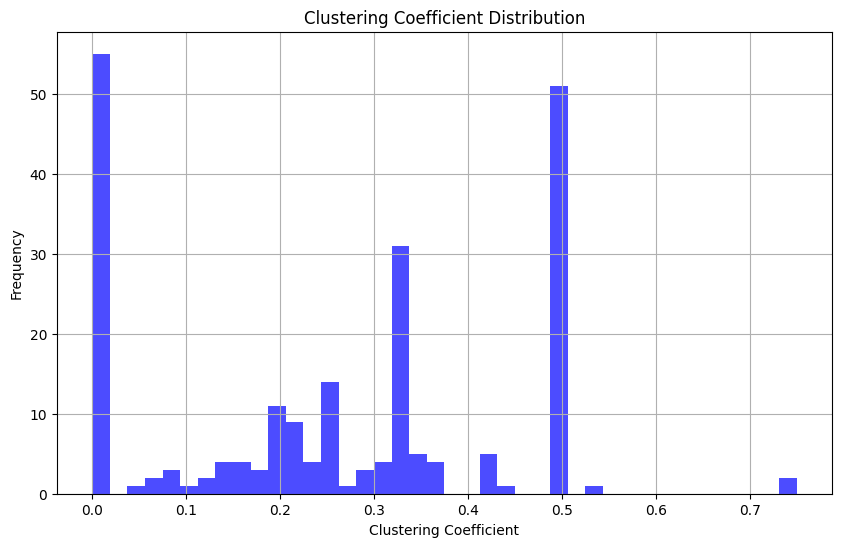

In [5]:
import matplotlib.pyplot as plt

clustering_coefficients = nx.clustering(G)
# Preparing data for visualization
clustering_values = list(clustering_coefficients.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(clustering_values, bins=40, color='blue', alpha=0.7)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
# Display the plot
plt.show()

In [34]:
clustering_coefficients = nx.clustering(G)
clustering_coefficients

{'UCIh_TPYPqjJuS_-nOfAIlfg': 0.008101010101010102,
 'UC-2YHgc363EdcusLIBbgxzg': 0.09047619047619047,
 'UC-6OW5aJYBFM33zXQlBKPNA': 0.3333333333333333,
 'UC-nPM1_kSZf91ZGkcgy_95Q': 0.5,
 'UC06b5TQFFMFZvMakw1QLpQg': 0.5,
 'UC0ASolYU_Yh3yShLFQC0stg': 0.26666666666666666,
 'UC0ahC64OhIAS11TJX9Ig86A': 0.2,
 'UC1Aq3T1GmKcObLqo1YIU_Ww': 0.25,
 'UC1CVzH-XVr3E-kTT6D8hhfg': 0.25,
 'UC1KJEk-EZMmDF9DJKMK5OCQ': 0,
 'UC1KbedtKa3d5dleFR6OjQMg': 0.3333333333333333,
 'UC1rFmaGLYr0Ve_Y_soxZNWQ': 0,
 'UC26wVFmrwOSyMWwHmBbndhg': 0.18181818181818182,
 'UC2D2CMWXMOVWx7giW1n3LIg': 0.3333333333333333,
 'UC3DkFux8Iv-aYnTRWzwaiBA': 0.19047619047619047,
 'UC3Fc8oa1IpkG970GOIHNQvg': 0.5,
 'UC3LqW4ijMoENQ2Wv17ZrFJA': 0.21666666666666667,
 'UC3Va-8NnzTuV-Yv-JlyuQsQ': 0,
 'UC3lJL1pUvQ2Ih2qZ-4ozrLw': 0.75,
 'UC4FhvdvgZU5CVbXi2uWgiZg': 0.35,
 'UC4QZ_LsYcvcq7qOsOhpAX4A': 0.16666666666666666,
 'UC4kjDjhexSVuC8JWk4ZanFw': 0.5,
 'UC4m2G6T18_JcjwxwtwKJijw': 0.5,
 'UC4w_tMnHl6sw5VD93tVymGw': 0.5,
 'UC51T6qSRDmVsENyV57Mjkgg':

In [35]:
# Extracting channel labels along with their clustering coefficient
channel_labels_with_clustering = [(G.nodes[node]['label'], clustering_coefficients[node]) 
                                  for node in G.nodes()]
# Displaying the data
channel_labels_with_clustering.sort(key=lambda x: x[1], reverse=True)
channel_labels_with_clustering

[('SoundGuys', 0.75),
 ('Gary Explains', 0.75),
 ('Alex Leonidas', 0.5263157894736842),
 ('How to ADHD', 0.5),
 ('Clark Elieson', 0.5),
 ('Channel Pup', 0.5),
 ('Variant Comics', 0.5),
 ('samy kamkar', 0.5),
 ('Inside Gaming', 0.5),
 ('Testosterone Nation', 0.5),
 ('VitruvianPhysique', 0.5),
 ('Siim Land', 0.5),
 ('TechCrunch', 0.5),
 ('Chris Stuckmann', 0.5),
 ('NewRetroWave', 0.5),
 ('Dom Esposito', 0.5),
 ('The Enigma TNG', 0.5),
 ('Game Informer', 0.5),
 ('ACG', 0.5),
 ('The Imaginary Axis', 0.5),
 ('JeromeFitness', 0.5),
 ('gameranx', 0.5),
 ('Comic Book Girl 19', 0.5),
 ('Bret Contreras Glute Guy', 0.5),
 ('MrMobile [Michael Fisher]', 0.5),
 ('Joshua Vergara', 0.5),
 ('Jim Stoppani  PhD', 0.5),
 ('Game Apologist', 0.5),
 ('Mark Wildman', 0.5),
 ('MobileTechReview', 0.5),
 ('JimmyTheGiant', 0.5),
 ('Fortress', 0.5),
 ('GameSpot', 0.5),
 ('Invincible Worldwide', 0.5),
 ('Josh Bryant', 0.5),
 ('Music for creators', 0.5),
 ('Android Authority', 0.5),
 ('VincaniTV', 0.5),
 ('MovNat', 

In [36]:
triangles = nx.triangles(G.to_undirected())
total_triangles = sum(triangles.values()) // 3  # Each triangle is counted three times
total_triangles

491

In [37]:
import pandas as pd
# Finding triangles and sorting nodes within each cycle
triangles = list(nx.simple_cycles(G.to_directed(), length_bound=3))
triangles = [sorted(cycle, key=lambda x: G.nodes[x]['label']) for cycle in triangles if len(cycle) == 3]

# Remove duplicate triangles
triangles = list(set(tuple(cycle) for cycle in triangles))

# Create a dataframe to display the triangles with node labels
triangles_df = pd.DataFrame([tuple(G.nodes[node]['label'] for node in triangle) for triangle in triangles], columns=['Node 1', 'Node 2', 'Node 3'])
triangles_df

,Node 1,Node 2,Node 3
0,Be Smart,PBS Idea Channel,PBS Space Time
1,Alex Leonidas,Fight Commentary Breakdowns,The Bioneer
2,Android Authority,Gary Explains,SoundGuys
3,Fight Commentary Breakdowns,The Bioneer,hard2hurt
4,BBC Earth Science,Be Smart,PBS Space Time
5,FitnessFAQs,SaturnoMovement,Tom Merrick
6,Alex Leonidas,Geoffrey Verity Schofield,The Bioneer
7,Bodybuilding.com,OfficialBarstarzz,THENX


In [38]:
undirected_graph = G.to_undirected()

# Finding triangles in the undirected graph
triangles = nx.triangles(undirected_graph)
# Identifying channels that form triangles (i.e., have a triangle count > 0)
channels_in_triangles = [(G.nodes[node]['label'], count) 
                         for node, count in triangles.items() if count > 0]
# Displaying a sample of the data
channels_in_triangles

[('The Bioneer', 359),
 ('Joe Scott', 36),
 ('Engadget', 2),
 ('How to ADHD', 1),
 ('Clark Elieson', 1),
 ('Elliott Hulse’s STRENGTH CAMP', 8),
 ('STRENGTH WARS', 6),
 ('Bulletproof', 3),
 ('FitnessFAQs', 19),
 ('alpha m.', 4),
 ('Strength Project', 13),
 ('Andrew Huberman', 2),
 ('Peter McKinnon', 8),
 ('Channel Pup', 1),
 ('PBS Idea Channel', 32),
 ('SoundGuys', 3),
 ('Hodge Twins', 7),
 ('ColdFusion', 7),
 ('Variant Comics', 1),
 ('samy kamkar', 1),
 ('Inside Gaming', 1),
 ('Wisecrack', 6),
 ('Bad Lip Reading', 2),
 ('Jeff Nippard', 13),
 ('Testosterone Nation', 1),
 ('PBS Space Time', 15),
 ('Captain Sinbad', 2),
 ('Bodybuilding.com', 28),
 ('Strength Side', 2),
 ('AnimeAjay', 2),
 ('VitruvianPhysique', 2),
 ('CNET Home', 24),
 ('Siim Land', 1),
 ('Fight Commentary Breakdowns', 7),
 ('DEATH BATTLE!', 4),
 ('CT Fletcher Motivation', 7),
 ('The Rock', 2),
 ('TechCrunch', 1),
 ('Chris Stuckmann', 1),
 ('NewRetroWave', 1),
 ('Dictionary of Obscure Sorrows', 7),
 ('Jonathan Morrison', 9

In [39]:
triangle_closure = nx.transitivity(G)
triangle_closure

0.01069047436585179

In [40]:
# Calculate PageRank
pagerank = nx.pagerank(G, max_iter=100_000, alpha=0.85, tol=1e-10)
# Extracting channel labels along with their PageRank
channel_labels_with_pagerank = [(G.nodes[node]['label'], pagerank[node]) for node in G.nodes()]

# Sort the channels by their PageRank for better understanding
sorted_channel_labels_with_pagerank = sorted(channel_labels_with_pagerank, key=lambda x: x[1], reverse=True)
sorted_channel_labels_with_pagerank

[('Frank Medrano', 0.045258356465040436),
 ('Vsauce2', 0.03748209530616128),
 ('Vsauce3', 0.036542945435832766),
 ('Strength Project', 0.025898808400505596),
 ('CT Fletcher Motivation', 0.024422233386452476),
 ('fightTIPS', 0.023787608814255942),
 ('JeromeFitness', 0.02248731474949649),
 ('Android Authority', 0.015468302100481224),
 ('SoundGuys', 0.015377179193839408),
 ('Gary Explains', 0.015377179193839408),
 ('The Enigma TNG', 0.015118997627382409),
 ('Saiyan Enigma', 0.015118997627382409),
 ('Numberphile', 0.013622887331601694),
 ('Jonathan Morrison', 0.011526497692095464),
 ('Tim Ferriss', 0.01115213901714623),
 ('The Verge', 0.00914692783212465),
 ('Bodybuilding.com', 0.008853655102330535),
 ('FitnessFAQs', 0.008228514729942838),
 ('Polygon', 0.007765818292306591),
 ('Jacob Geller', 0.007267380617484524),
 ('ColdFusion', 0.006956785954213922),
 ('minutephysics', 0.00688078427491186),
 ('Geekdom101', 0.006797879354810396),
 ('Jeff Nippard', 0.006453732681810418),
 ('Seeker+', 0.00